# Drowsiness Detection Model

This notebook aims to create a Drowsiness Detection model using a ResNet Model. The model classifies images into the following categories:

1. Eyes closed
2. Eyes open



## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam,SGD
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.applications import VGG16

## Dataset

The Drowsiness Detection Dataset includes sequences of eye images with labels indicating whether the eyes are open or closed. The dataset is diverse and captures subjects of varying demographics under controlled driving scenarios.

## Data Loading and Preprocessing

The dataset is loaded using Kaggle API, and the eye images are preprocessed.

In [2]:
# Upload your Kaggle API key (kaggle.json) file
from google.colab import files
files.upload()

# Move the Kaggle API key to the required directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d hazemfahmy/openned-closed-eyes
!unzip -q openned-closed-eyes.zip -d dataset-folder

Saving kaggle.json to kaggle.json
 99% 522M/526M [00:02<00:00, 320MB/s]
100% 526M/526M [00:02<00:00, 272MB/s]


In [3]:
train_data_path = '/content/dataset-folder/TrainingSet/TrainingSet'
test_data_path = '/content/dataset-folder/TestSet/TestSet'

In [10]:
training_data = keras.preprocessing.image_dataset_from_directory(
    test_data_path,
    batch_size=16,
    image_size=(224, 224),
    shuffle=True,
    seed=123,
    subset='training',
    validation_split=0.1
)

test_data = keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    batch_size=16,
    image_size=(224, 224),
    shuffle=True,
    seed=123,
    validation_split=0.9,
    subset='validation'
)


Found 4232 files belonging to 2 classes.
Using 3809 files for training.
Found 1704 files belonging to 2 classes.
Using 1533 files for validation.


## Sample Images
Visualizing a few sample images from the training dataset:

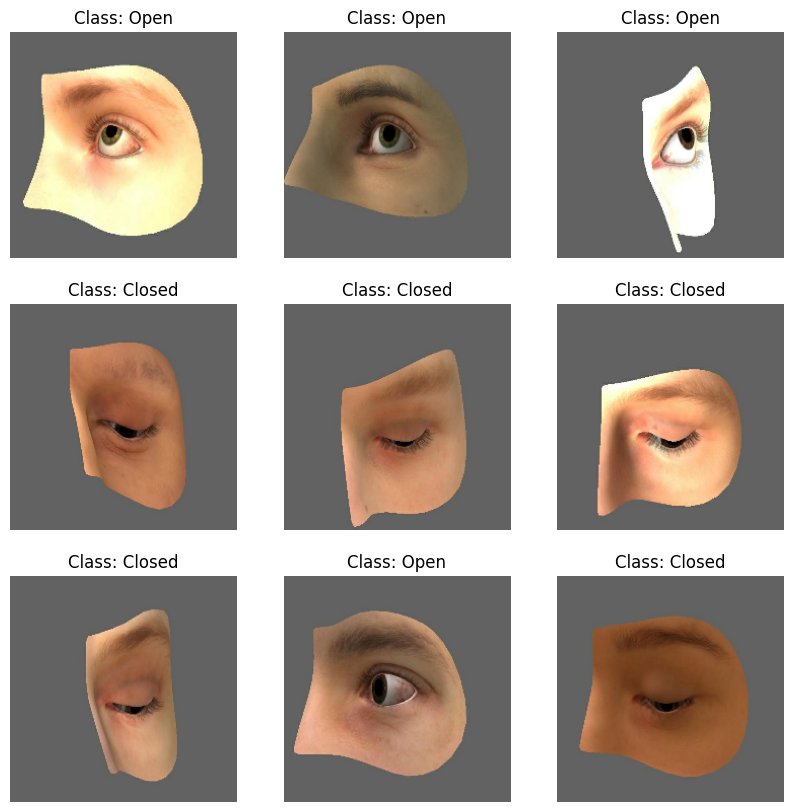

In [5]:
class_mapping = {0: "Closed", 1: "Open"}
plt.figure(figsize=(10, 10))
for images, labels in training_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        text_label = class_mapping[labels[i].numpy()]

        plt.title(f"Class: {text_label}")
        plt.axis("off")
plt.show()

## Model Architecture
The Drowsiness Detection model is built using a Sequential model with a Convolutional Neural Network (CNN) architecture.

The CNN model consists of a pretrained VGG16 base, followed by a Flatten layer, three Dense layers with ReLU activation, and a final Dense layer with Softmax activation for classification into two classes (open or closed).



In [11]:
vgg16_model = Sequential()
pretrained_vgg16 = VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False)
for layer in pretrained_vgg16.layers:
    layer.trainable = False

vgg16_model.add(pretrained_vgg16)
vgg16_model.add(layers.Flatten())
vgg16_model.add(layers.Dense(4096, activation='relu'))
vgg16_model.add(layers.Dense(4096, activation='relu'))
vgg16_model.add(layers.Dense(2, activation='softmax'))

vgg16_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 4096)              102764544 
                                                                 
 dense_4 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_5 (Dense)             (None, 2)                 8194      
                                                                 
Total params: 134268738 (512.19 MB)
Trainable params: 119554050 (456.06 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


## Model Training
The model is compiled using :
*  Loss function : sparse_categorical_crossentropy
*  Optimizer: SGD
*  Evaluation metric : Accuracy
*  Learning Rate :0.00001
*  Epoch: 5
*  Batch size:16




In [12]:
vgg16_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.00001), metrics=['accuracy'])

In [13]:
epochs=5
history_vgg16 = vgg16_model.fit(
    training_data,
    validation_data=test_data,
    epochs=epochs
)

Epoch 1/5
239/239 [==============================] - 34s 131ms/step - loss: 0.6528 - accuracy: 0.8422 - val_loss: 0.5281 - val_accuracy: 0.8506
Epoch 2/5
239/239 [==============================] - 28s 119ms/step - loss: 0.2715 - accuracy: 0.9212 - val_loss: 0.3415 - val_accuracy: 0.9243
Epoch 3/5
239/239 [==============================] - 28s 118ms/step - loss: 0.2105 - accuracy: 0.9357 - val_loss: 0.3234 - val_accuracy: 0.9250
Epoch 4/5
239/239 [==============================] - 28s 118ms/step - loss: 0.1719 - accuracy: 0.9485 - val_loss: 0.3141 - val_accuracy: 0.9256
Epoch 5/5
239/239 [==============================] - 28s 118ms/step - loss: 0.1448 - accuracy: 0.9569 - val_loss: 0.3143 - val_accuracy: 0.9250


## Training and Validation Curves
Visualizing the training and validation loss and accuracy over epochs:

Plot training and validation loss:



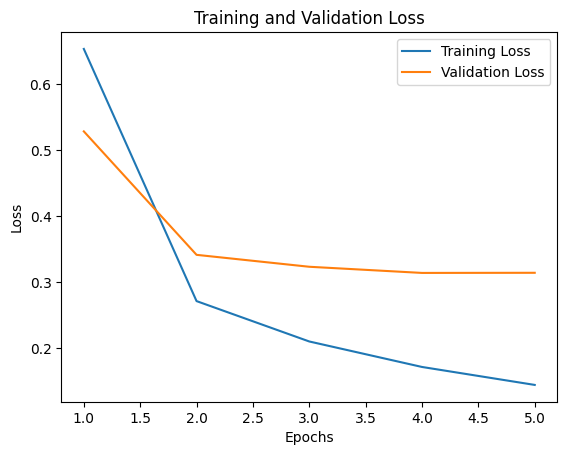

In [14]:
# Loss plot
epochs_range = range(1, epochs + 1)

print("Plot training and validation loss:\n")
plt.figure()
plt.plot(epochs_range, history_vgg16.history['loss'], label='Training Loss')
plt.plot(epochs_range, history_vgg16.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Plot training and validation accuracy:



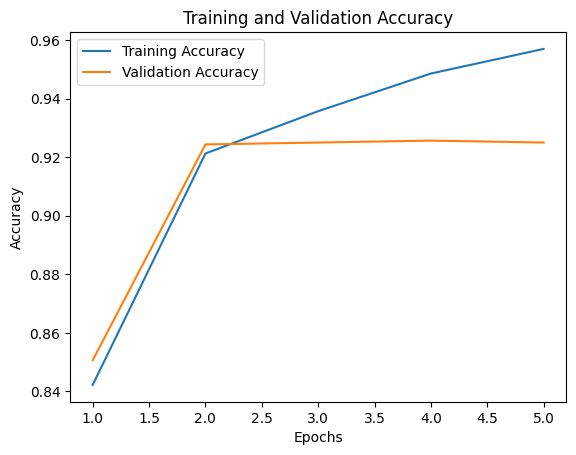

In [15]:
#Accuracy Plot
print("Plot training and validation accuracy:\n")
plt.figure()
plt.plot(epochs_range, history_vgg16.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Model Evaluation
The model's performance is evaluated on a separate test dataset, and accuracy metrics are used.

In [16]:
loss, accuracy = vgg16_model.evaluate(test_data)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

96/96 [==============================] - 7s 71ms/step - loss: 0.3143 - accuracy: 0.9250
Validation Accuracy: 92.50%


## Visualizing Predictions
Visualizing model predictions on a subset of the test dataset:

1/1 [==============================] - 0s 27ms/step


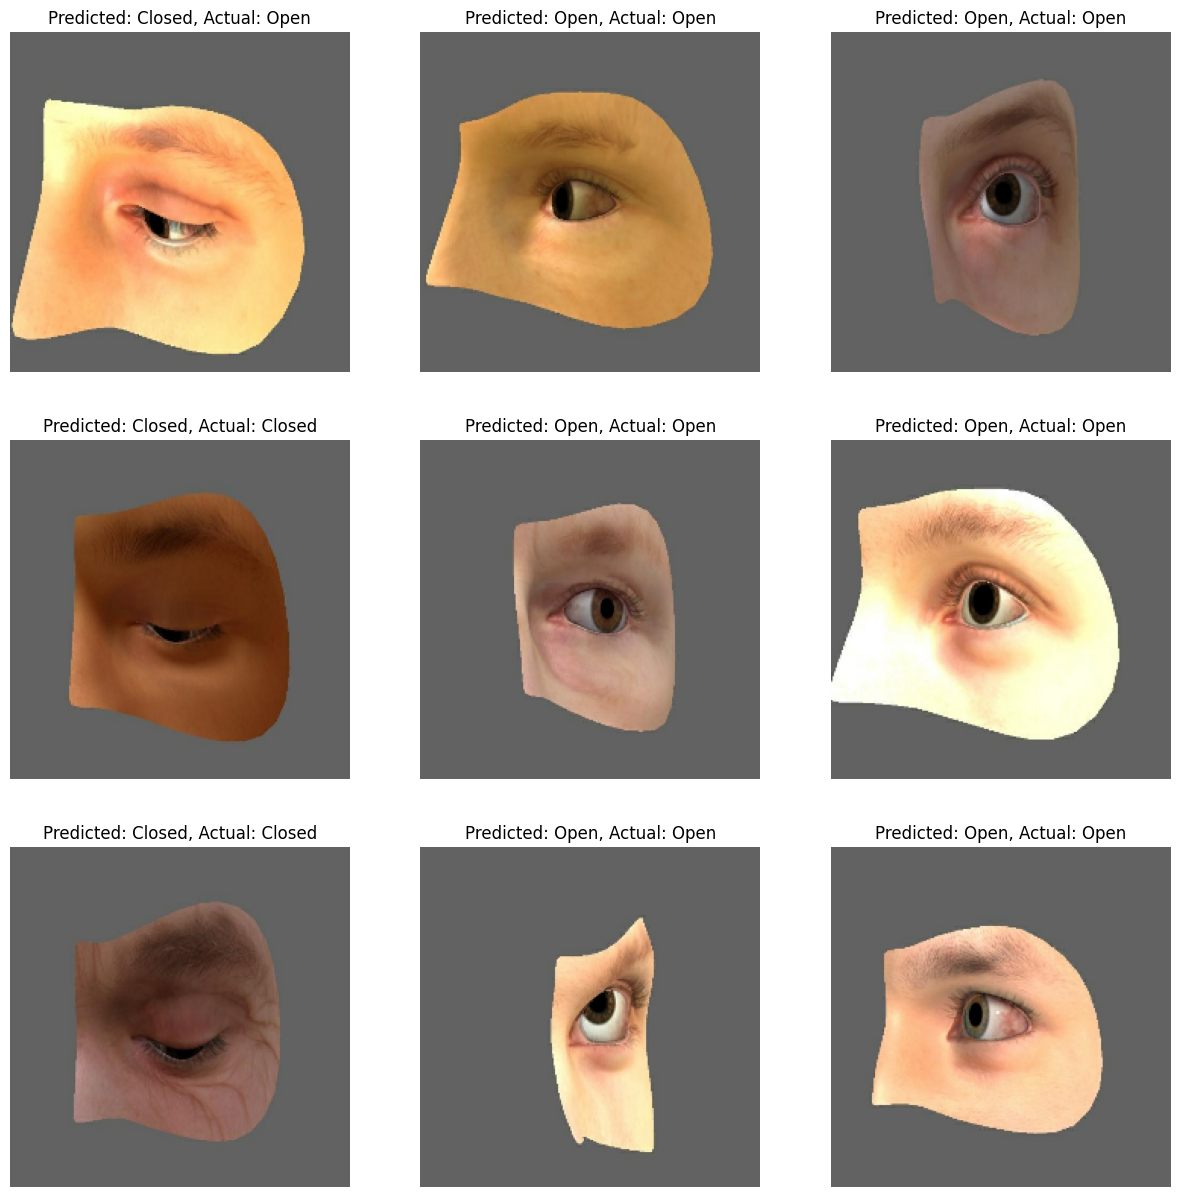

In [18]:
plt.figure(figsize=(15, 15))
for images, labels in test_data.take(1):
    predictions = vgg16_model.predict(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class = class_mapping[np.argmax(predictions[i])]
        true_class = class_mapping[labels[i].numpy()]

        plt.title(f"Predicted: {predicted_class}, Actual: {true_class}")
        plt.axis("off")
plt.show()